# IMPORTING LIBRARIES
`pandas` for data handling, `matplotlib` and `seaborn` for visualization, and `scikit-learn` for model building and evaluation. T


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING AND EXPLORING THE DATASET

The dataset was loaded and inspected to understand its structure, shape, and summary statistics.

In [34]:
data = pd.read_csv("heart.csv")

In [35]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [37]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
data.shape

(303, 14)

In [39]:
data.size

4242

In [40]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [41]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# DATA VISUALIZATION
A correlation heatmap was plotted to examine the relationships between features and their relationship with the target variable.

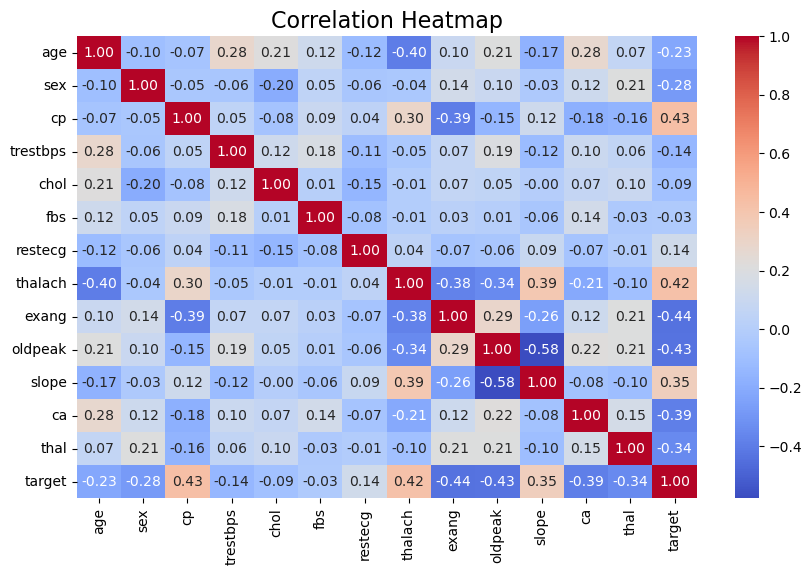

In [42]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# DATA PREPARATION

The dataset was divided into training and testing sets. 

In [43]:
X = data.drop(columns=['target'], axis=1)

y = data['target']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


# MODEL TRAINING 

Support Vector Machine models with linear kernel was trained on the dataset.

In [45]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C=3)

In [46]:
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

# MODEL EVALUATION

The models were evaluated using accuracy, precision, recall, and F1-score.

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.94      0.92      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# CONCLUSION
The Support Vector Machine model with a linear kernel achieved strong performance, reaching an overall accuracy of 92%. Precision and recall values were consistently high across both classes, indicating that the model balanced false positives and false negatives effectively. The results demonstrate that a linear kernel is well-suited for this dataset, providing reliable classification performance without the need for additional feature scaling or hyperparameter tuning.

